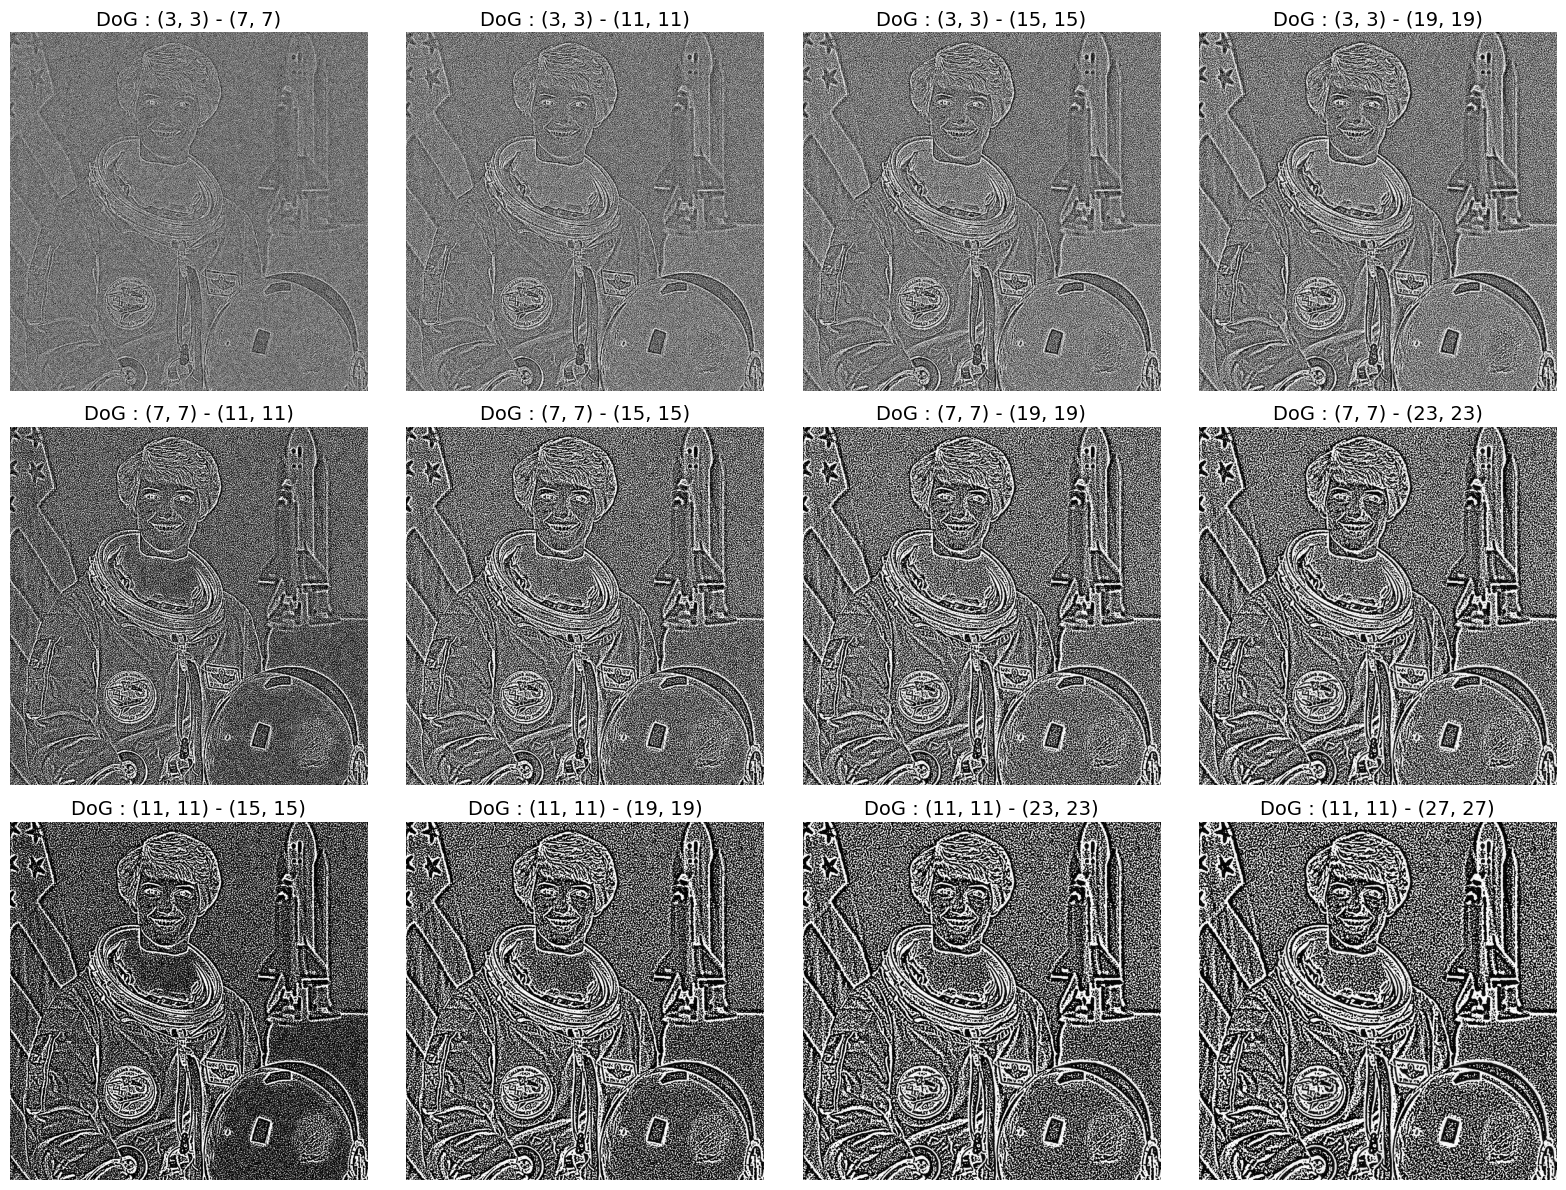

In [23]:
import cv2, numpy as np, matplotlib.pyplot as plt

# 이미지 불러오기 (흑백 이미지로 변환)
image = cv2.imread('example.jpg', cv2.IMREAD_GRAYSCALE)

# 첫 번째 블러 크기 리스트 (변경된 크기)
first_kernel_sizes = [(3, 3), (7, 7), (11, 11)]

# 두 번째 블러 크기 리스트 (각각 첫 번째 크기보다 4씩 큰 값들)
second_kernel_sizes = {
    (3, 3): [(7, 7), (11, 11), (15, 15), (19, 19)],
    (7, 7): [(11, 11), (15, 15), (19, 19), (23, 23)],
    (11, 11): [(15, 15), (19, 19), (23, 23), (27, 27)]
}

# 폰트 사이즈
fs = 14

# 결과 출력
plt.figure(figsize=(16, 12))  # 출력 크기 설정

# 첫 번째 블러 크기마다 두 번째 블러 크기들을 순차적으로 처리
for i, k1 in enumerate(first_kernel_sizes):  # 첫 번째 블러 크기 (3x3, 7x7, 11x11)
    for j, k2 in enumerate(second_kernel_sizes[k1]):  # 첫 번째 블러 크기에 맞는 두 번째 블러 크기 선택
        
        blurred_image_1 = cv2.GaussianBlur(image, k1, 0)  # 첫 번째 블러
        blurred_image_2 = cv2.GaussianBlur(image, k2, 0)  # 두 번째 블러
        
        # DoG (Difference of Gaussian) 이미지 계산
        dog = blurred_image_1 - blurred_image_2 
        
        # 3행 4열로 출력될 위치 설정
        plt.subplot(3, 4, i * 4 + j + 1)  # 첫 번째 블러 크기마다 두 번째 블러 크기 순차적으로 출력
        plt.title(f"DoG : {k1} - {k2}", fontsize=fs)
        plt.imshow(dog, cmap='gray', vmin=0, vmax=255)  # vmin, vmax로 명확한 색상 범위 설정
        plt.axis('off')

plt.tight_layout()
plt.show()